## 1) Preparing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df.head()


/var/folders/v1/mtx8w7_x4_v9cxfsnmjqfxlm0000gn/T/ipykernel_65979/1936513664.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
print('Shape of the DataFrame:', df.shape)
print('Missing values:', df.isnull().sum())


Shape of the DataFrame: (200, 5)
Missing values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#### As we can see, gender is the only categorical variable. For sake of data analysis, let's convert it to numerical

In [3]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


## 2) EDA

#### Summary of dataset

In [4]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


#### Correlation matrix

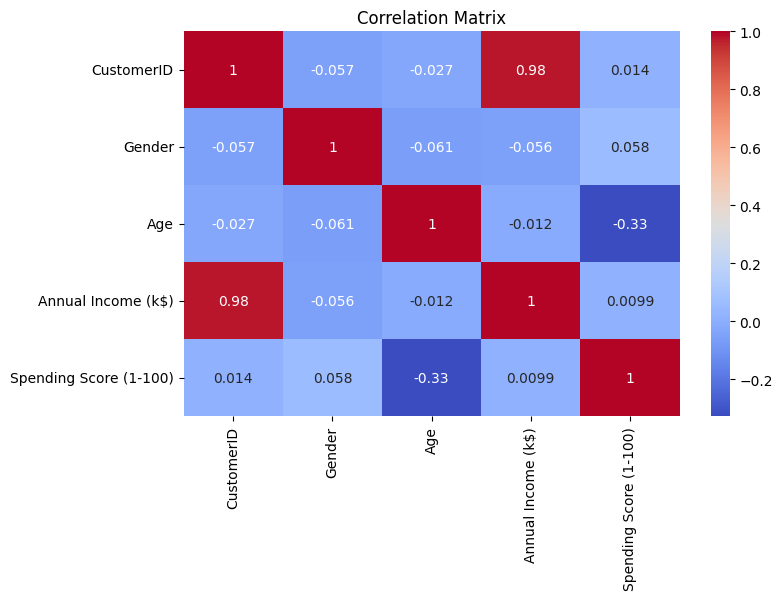

In [5]:
# Compute the correlation matrix
corr_all = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_all, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Gender
1    112
0     88
Name: count, dtype: int64


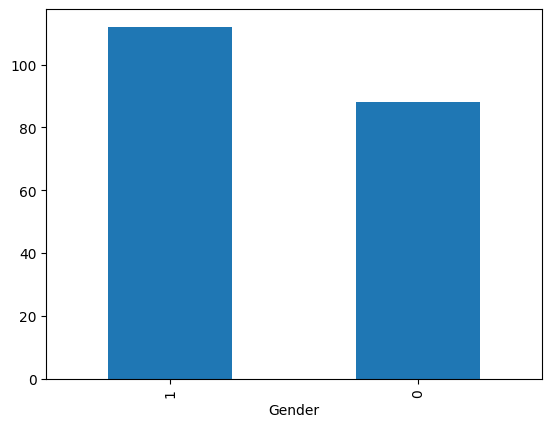

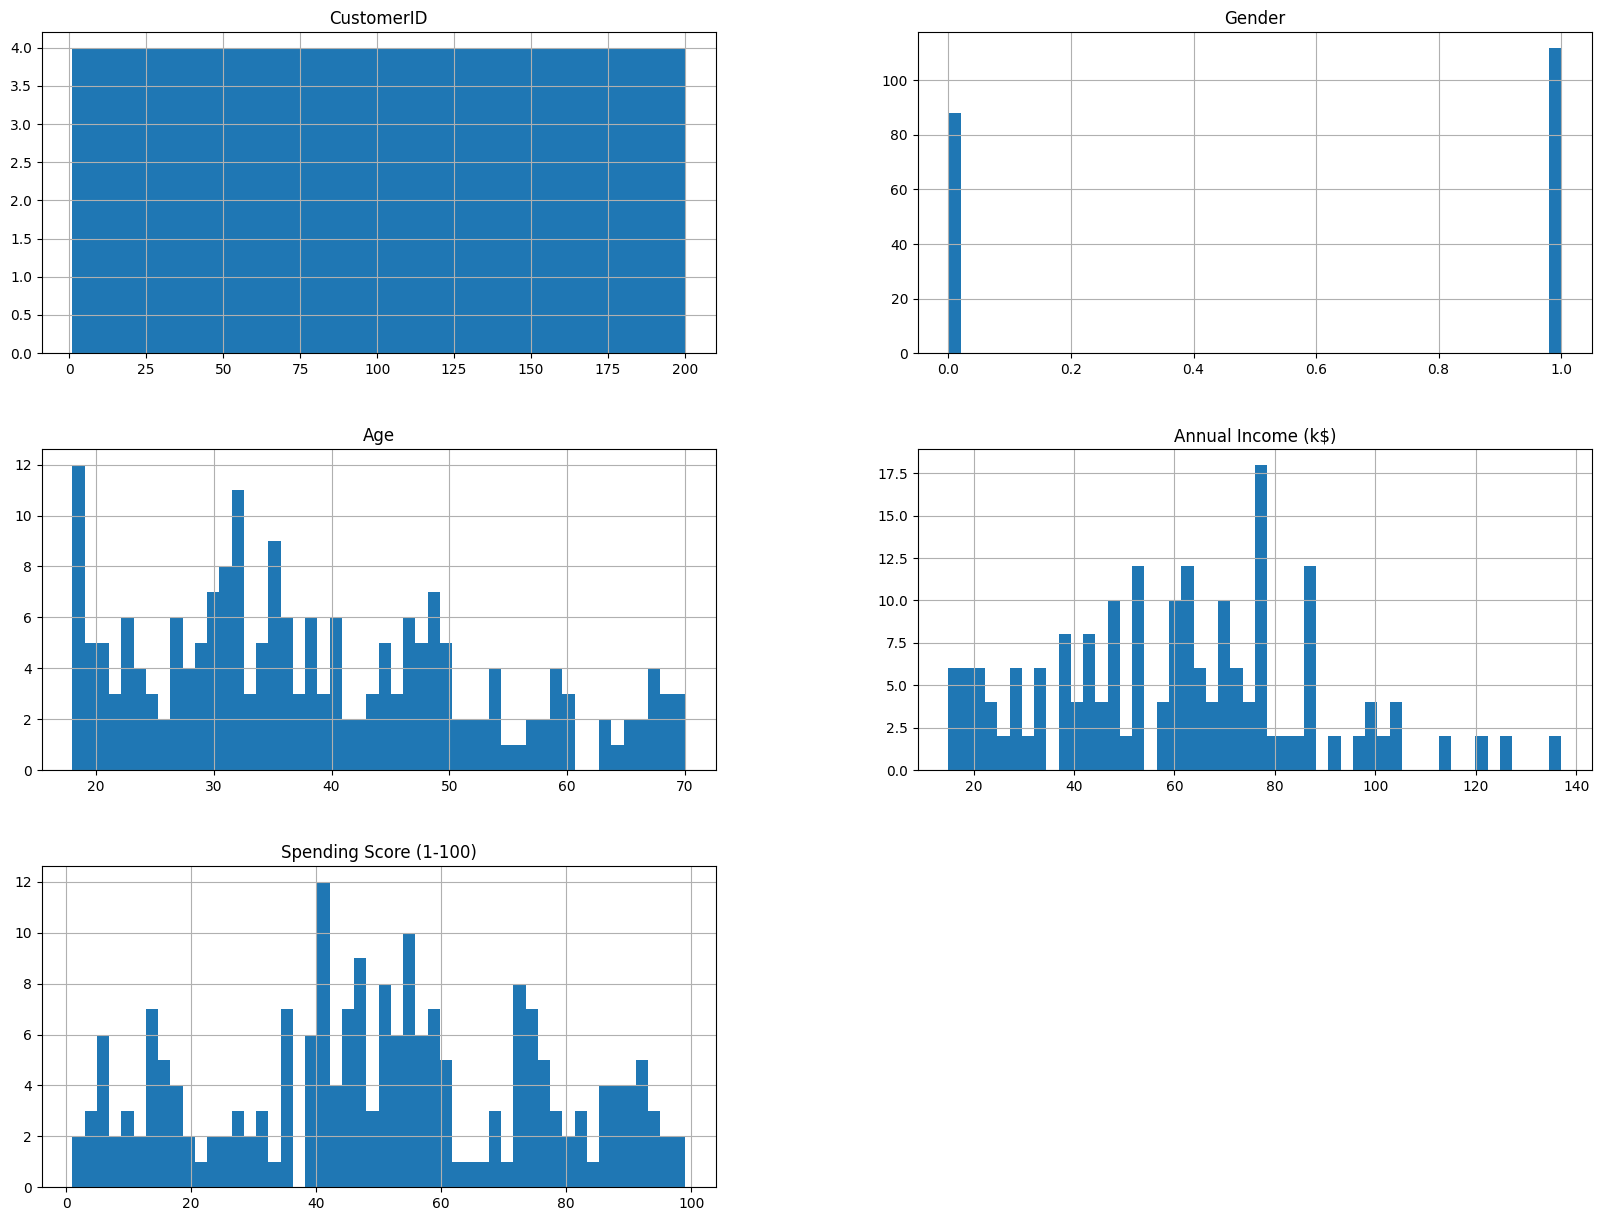

In [6]:
print(df['Gender'].value_counts())


df['Gender'].value_counts().plot(kind='bar')
plt.show()

df.hist(bins=50, figsize=(20,15))
plt.show()

### Conclusion based on historgram
CustomerID Is not a useful feature for clustering both from the histogram, and the fact that it is usuallu just an identifier with no inherent meaning or pattern. Hence, we will be excluding it from the clustering

Gender wise, there are slightly more females than males. The gender will likely be a significant factor when determining spending behaviour or product preferences.

Age distribution appeares to be slightly skewed towards the left, representing the lower age groups, particiularly those between 20 and 40 years old. We believe we can reasonably expect certain clusters to contain 1 or 2 predominant age range.

Annual Income seem to have a bimodal distrubiton, with one peak around 50-60k$ range, and the other around 80k$ range. There are much more in the lower range (<30k$) than the higher range (>100k$). This could indicate distinct clusters in terms of income, which we can reasonably expect align with spending behaviour or product preferences. 

Spending score would be the most even distributed, peaking around the center at 40-60

## 3) Data Pre-Processing

As discussed in the previous section, we shall drop the CustomerID section.

In [7]:
df_new = df.drop(['CustomerID'], axis = 1)
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### 3.1 Visualizing data after pre-processing

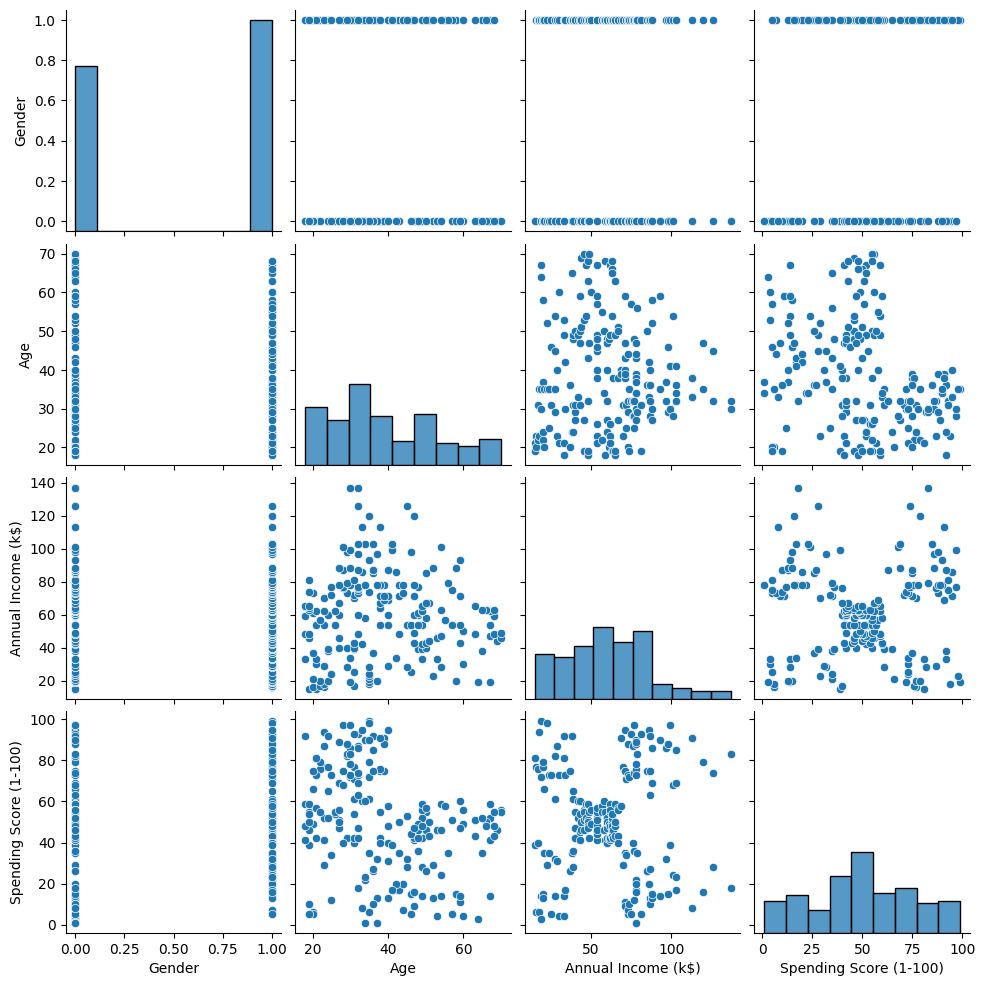

In [8]:
sns.pairplot(df_new[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]);

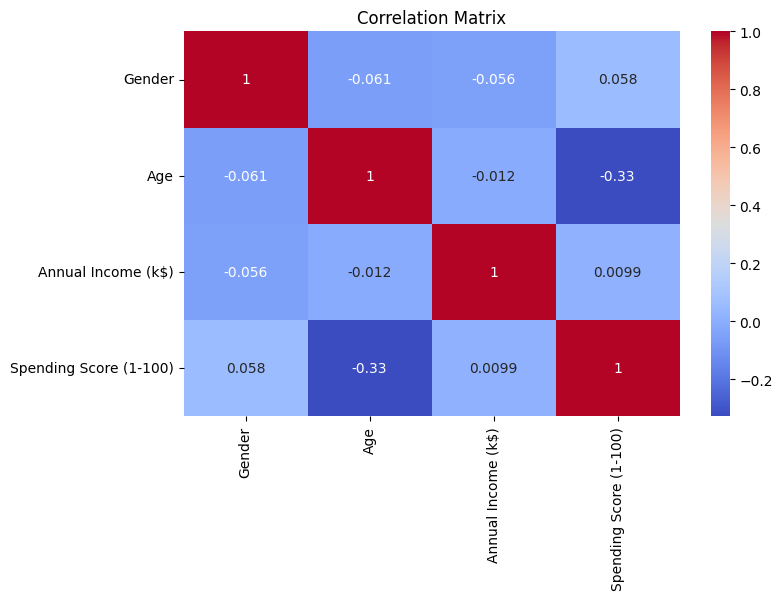

In [9]:
# Compute the correlation matrix
corr_all = df_new.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_all, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 4) Perform Clustering on 2 most important feature

### 4.1) Prepare the data

In [10]:
from sklearn.cluster import AgglomerativeClustering

df_reduced = df_new[['Annual Income (k$)', 'Spending Score (1-100)']]
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=3)  # Use None to allow for dendrogram visualization
clustering.fit(df_reduced)


AgglomerativeClustering(distance_threshold=3, n_clusters=None)

### 4.2) Visualise clustering

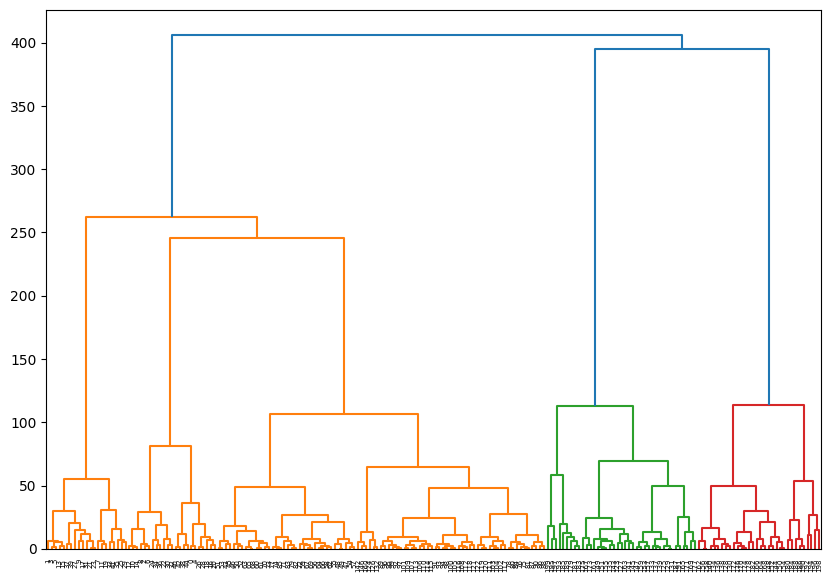

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Perform linkage
Z = linkage(df_reduced, method='ward')  # 'ward' minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()


### 4.3) Evaluate clustering by Silhouette score:

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507
Silhouette Score for 10 clusters: 0.4342656377895271
Silhouette Score for 11 clusters: 0.4235291810694601
Silhouette Score for 12 clusters: 0.4292221461834499
Silhouette Score for 13 clusters: 0.4115159018886883
Silhouette Score for 14 clusters: 0.4116644433478917
Silhouette Score for 15 clusters: 0.41938401859787305
Silhouette Score for 16 clusters: 0.4191386867941397
Silhouette Score for 17 clusters: 0.4123238100861266
Silhouette Score for 18 clusters: 0.422988685948502
Silhouette Score for 19 clusters: 0.42079092019236053
Silhouette Score for 20 clusters: 0.4221992230734392

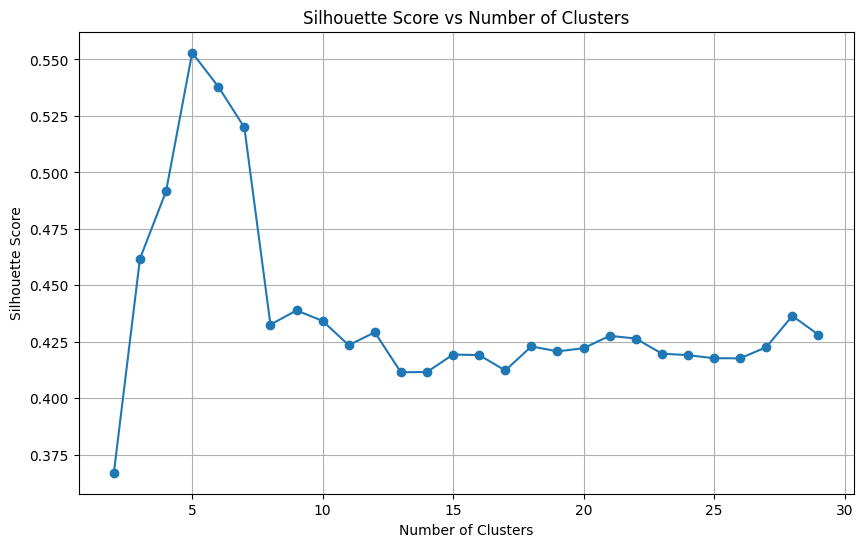

In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
cluster_range = range(2,30)
for i in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=i) 
    clustering.fit(df_reduced)
    score = silhouette_score(df_reduced, clustering.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {i} clusters: {score}")

# Plot silhouette score vs number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [13]:
print("Maximum Silhouette Score = ", max(silhouette_scores))
print("Number of clusters = ", silhouette_scores.index(max(silhouette_scores)) + 2)

Maximum Silhouette Score =  0.5529945955148897
Number of clusters =  5


#### Conclusion with Silhouette Method
We notice that the score increases sharply until n=5. It then drops sharply until n=8 and remain relatively stable for larger n.

## 4.4) Evaluate cluserting by Davies-Bloudin score

#### Davies-Bouldin Index
 The Davies-Bouldin Index is a validation metric that is used to evaluate clustering models.
 It is calculated as the average similarity measure of each cluster with the cluster most similar to it.
 In this context, similarity is defined as the ratio between inter-cluster and intra-cluster distances.
 As such, this index ranks well-separated clusters with less dispersion as having a better score.

 Higher DB index values correspond to poorer clustering solutions. This is because a higher DBI value indicates that the clusters are not well-separated and/or that the clusters are not compact.

However, a lower DB index value is desirable. It indicates that the clusters are well-separated and compact, which is often a good indication of a successful clustering solution.
 
 Referenced from: https://www.geeksforgeeks.org/davies-bouldin-index/


Davies-Bouldin Index for 2 clusters: 1.3734011244003579
Davies-Bouldin Index for 3 clusters: 0.7068435076376502
Davies-Bouldin Index for 4 clusters: 0.6712836786400215
Davies-Bouldin Index for 5 clusters: 0.5782207452369451
Davies-Bouldin Index for 6 clusters: 0.6436494715040274
Davies-Bouldin Index for 7 clusters: 0.7104737091131165
Davies-Bouldin Index for 8 clusters: 0.7730869541324277
Davies-Bouldin Index for 9 clusters: 0.7740643491231535
Davies-Bouldin Index for 10 clusters: 0.7679109297031788
Davies-Bouldin Index for 11 clusters: 0.7529887369131196
Davies-Bouldin Index for 12 clusters: 0.7205830191075302
Davies-Bouldin Index for 13 clusters: 0.7687147230344659
Davies-Bouldin Index for 14 clusters: 0.7546477269713753
Davies-Bouldin Index for 15 clusters: 0.7245294868987124
Davies-Bouldin Index for 16 clusters: 0.738343996969445
Davies-Bouldin Index for 17 clusters: 0.736900599790266
Davies-Bouldin Index for 18 clusters: 0.7464352181620849
Davies-Bouldin Index for 19 clusters: 0.7

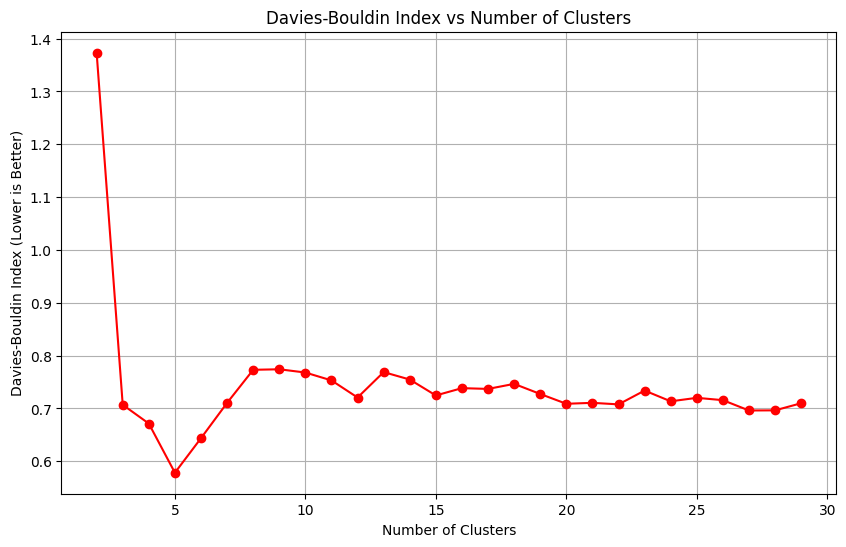

In [14]:
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

dbi_scores = []
cluster_range = range(2, 30) 

for i in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(df_reduced)
    score = davies_bouldin_score(df_reduced, clustering.labels_)
    dbi_scores.append(score)
    print(f"Davies-Bouldin Index for {i} clusters: {score}")

# Plot Davies-Bouldin Index vs Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, dbi_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index (Lower is Better)")
plt.grid(True)
plt.show()


In [15]:
print("Min Davies-Bouldin Score = ", min(dbi_scores))
print("Number of clusters = ", dbi_scores.index(min(dbi_scores)) + 2)

Min Davies-Bouldin Score =  0.5782207452369451
Number of clusters =  5


#### Conclusion with Davies-Bloudin Method

We noticed there is a sharp drop in dbi score from until n=5. (Note that for dbi score, the lower the better!). It then increases until n=8 and and remain relatively stable for larger number of clusters, which suggest increasing number of clusters beyond n=5 does not yield any improvement to cluster seperation.

### 4.5 Calinski Harabasz Score

CH Index for 2 clusters: 86.79455894460492
CH Index for 3 clusters: 143.81953140807286
CH Index for 4 clusters: 168.99240689146274
CH Index for 5 clusters: 243.07142892964563
CH Index for 6 clusters: 232.46420120838107
CH Index for 7 clusters: 237.09590414133663
CH Index for 8 clusters: 251.32552800907388
CH Index for 9 clusters: 253.12189442941394
CH Index for 10 clusters: 252.20438539491536
CH Index for 11 clusters: 252.9361640785421
CH Index for 12 clusters: 253.3754391603752
CH Index for 13 clusters: 255.29534583303519
CH Index for 14 clusters: 259.37183846019843
CH Index for 15 clusters: 263.98618812084766
CH Index for 16 clusters: 272.1130924594332
CH Index for 17 clusters: 283.8715046540351
CH Index for 18 clusters: 300.26199475157324
CH Index for 19 clusters: 304.4528208576304
CH Index for 20 clusters: 304.05768231661693
CH Index for 21 clusters: 304.4773926712022
CH Index for 22 clusters: 306.6834056889683
CH Index for 23 clusters: 309.47184090465504
CH Index for 24 clusters: 

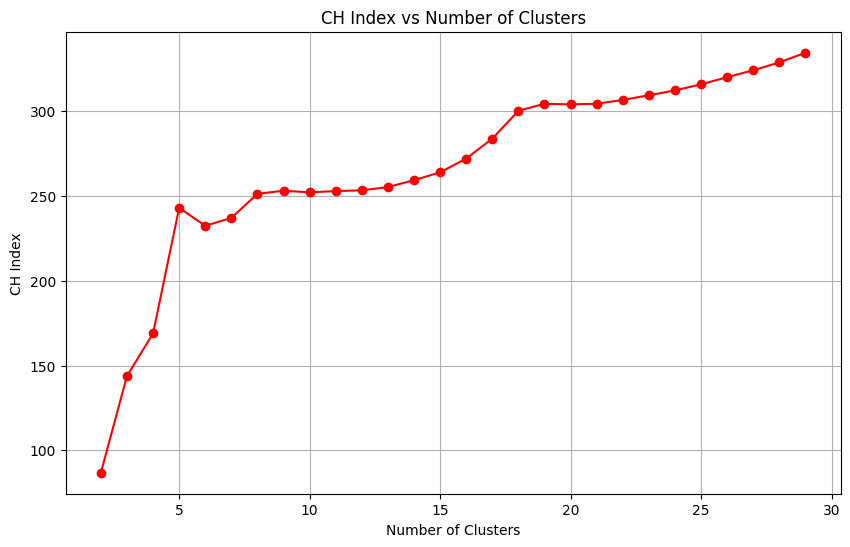

In [16]:
from sklearn.metrics import calinski_harabasz_score
hc_scores = []
cluster_range = range(2, 30) 

for i in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(df_reduced)
    score = calinski_harabasz_score(df_reduced, clustering.labels_)
    hc_scores.append(score)
    print(f"CH Index for {i} clusters: {score}")

# Plot Davies-Bouldin Index vs Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, hc_scores, marker='o', color='red')
plt.title("CH Index vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("CH Index")
plt.grid(True)
plt.show()


#### Conclusion with calinski_harabasz Method

Interestingly, the CH score kept increasing, implying that the optimal number of clusters may be better at much higher number of clusters. 

### 4.6) Insights from comparing both evaluation methods
Despite the CH Method suggesting a higher optimal n, there is a peak at n=5, which is the optimal number of clusters agreed upon by the previous 2 evaluation methods. Hence, we shall stick with n=5 as the optimal number of clusters for for further analysis

## 5. Perform Clustering and standardisation 

### 5.1) Prepare the data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = df.drop(['CustomerID'], axis = 1)
df_standardised = scaler.fit_transform(df_scale)
df_standardised = pd.DataFrame(df_standardised, columns=df_scale.columns)

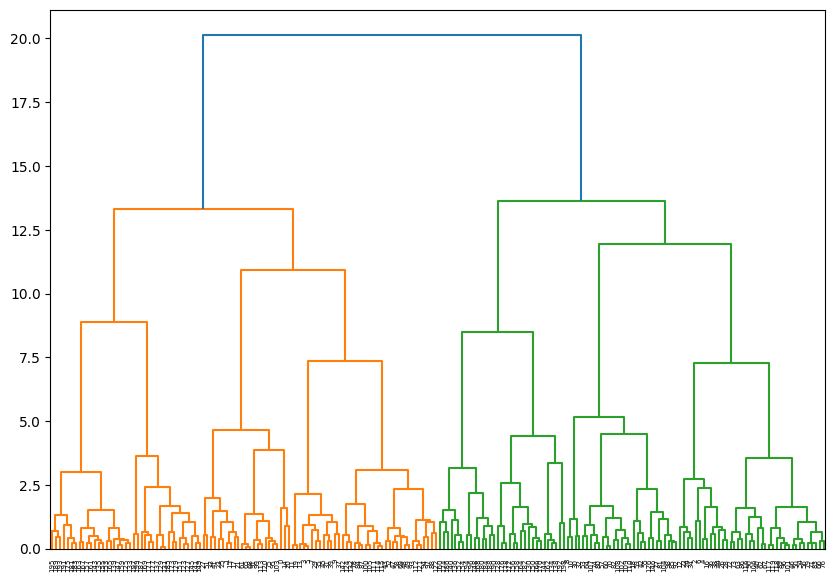

In [18]:
### 5.2) Visualise clustering

# Perform linkage
Z = linkage(df_standardised, method='ward')  # 'ward' minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()


Silhouette Score for 2 clusters: 0.24177953745462927
Silhouette Score for 3 clusters: 0.24834537795671963
Silhouette Score for 4 clusters: 0.26322605188202436
Silhouette Score for 5 clusters: 0.28699413201651747
Silhouette Score for 6 clusters: 0.31024459685260536
Silhouette Score for 7 clusters: 0.34555782664693324
Silhouette Score for 8 clusters: 0.3788796050129373
Silhouette Score for 9 clusters: 0.3922580535868779
Silhouette Score for 10 clusters: 0.4176254448686808
Silhouette Score for 11 clusters: 0.4251774863037225
Silhouette Score for 12 clusters: 0.42440324303677535
Silhouette Score for 13 clusters: 0.4198062925672963
Silhouette Score for 14 clusters: 0.4254321544952805
Silhouette Score for 15 clusters: 0.43446006438757967
Silhouette Score for 16 clusters: 0.43932320264453567
Silhouette Score for 17 clusters: 0.4206944029733773
Silhouette Score for 18 clusters: 0.42765394339048635
Silhouette Score for 19 clusters: 0.4252504276544904
Silhouette Score for 20 clusters: 0.41555511

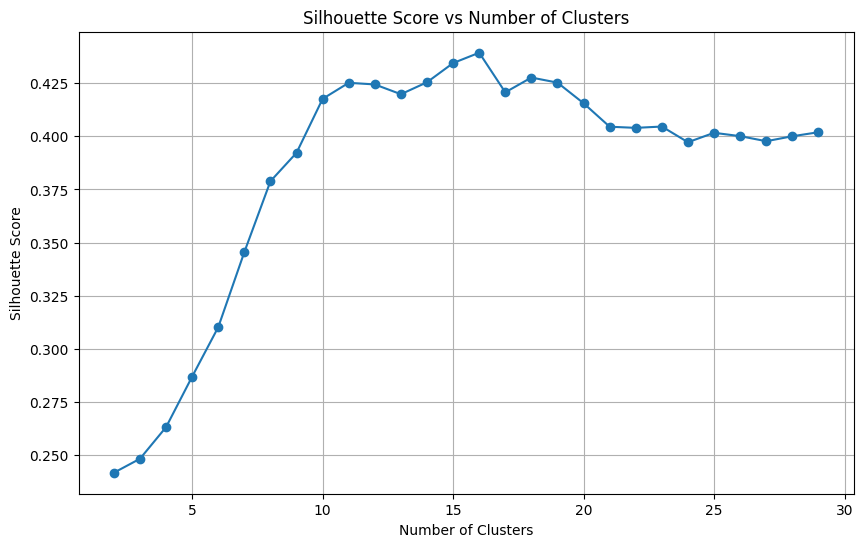

In [19]:
silhouette_scores = []
cluster_range = range(2,30)
for i in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=i) 
    clustering.fit(df_standardised)
    score = silhouette_score(df_standardised, clustering.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {i} clusters: {score}")

# Plot silhouette score vs number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [20]:
print("Maximum Silhouette Score = ", max(silhouette_scores))
print("Number of clusters = ", silhouette_scores.index(max(silhouette_scores)) + 2)

Maximum Silhouette Score =  0.43932320264453567
Number of clusters =  16


Davies-Bouldin Index for 2 clusters: 1.6611081566968284
Davies-Bouldin Index for 3 clusters: 1.4513514021782814
Davies-Bouldin Index for 4 clusters: 1.4019906658555517
Davies-Bouldin Index for 5 clusters: 1.2197730790225614
Davies-Bouldin Index for 6 clusters: 1.0729080656431618
Davies-Bouldin Index for 7 clusters: 1.0108316294354023
Davies-Bouldin Index for 8 clusters: 0.9678935716449805
Davies-Bouldin Index for 9 clusters: 0.8794457112810458
Davies-Bouldin Index for 10 clusters: 0.8247121765670091
Davies-Bouldin Index for 11 clusters: 0.7987123145195121
Davies-Bouldin Index for 12 clusters: 0.8232109327281641
Davies-Bouldin Index for 13 clusters: 0.8206852692039335
Davies-Bouldin Index for 14 clusters: 0.840739266808847
Davies-Bouldin Index for 15 clusters: 0.7854071682754059
Davies-Bouldin Index for 16 clusters: 0.7611158194669065
Davies-Bouldin Index for 17 clusters: 0.7696716000672071
Davies-Bouldin Index for 18 clusters: 0.7188492873154483
Davies-Bouldin Index for 19 clusters: 0.

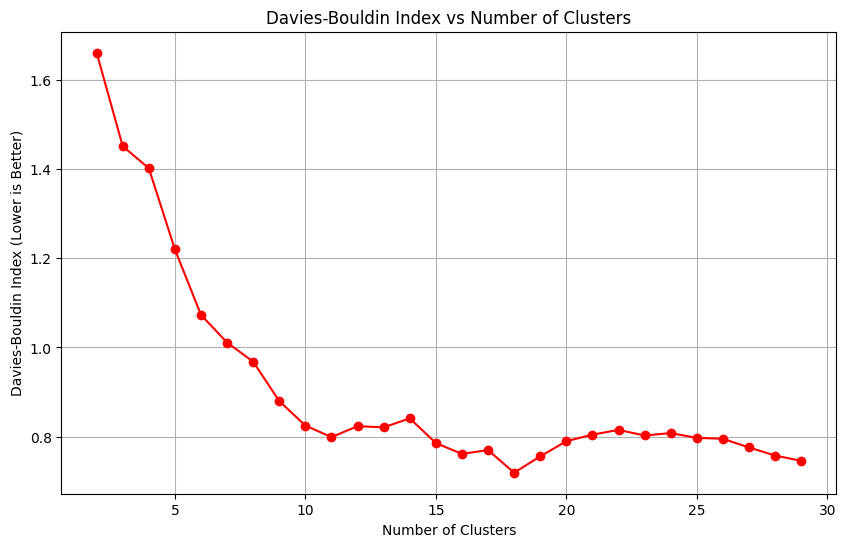

In [21]:
dbi_scores = []
cluster_range = range(2, 30) 

for i in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(df_standardised)
    score = davies_bouldin_score(df_standardised, clustering.labels_)
    dbi_scores.append(score)
    print(f"Davies-Bouldin Index for {i} clusters: {score}")

# Plot Davies-Bouldin Index vs Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, dbi_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index (Lower is Better)")
plt.grid(True)
plt.show()

In [22]:
print("Min Davies-Bouldin Score = ", min(dbi_scores))
print("Number of clusters = ", dbi_scores.index(min(dbi_scores)) + 2)

Min Davies-Bouldin Score =  0.7188492873154483
Number of clusters =  18


CH Index for 2 clusters: 67.04224546779565
CH Index for 3 clusters: 57.671893896362825
CH Index for 4 clusters: 60.30616043845132
CH Index for 5 clusters: 64.46870730105833
CH Index for 6 clusters: 70.22708890672489
CH Index for 7 clusters: 72.74974250076707
CH Index for 8 clusters: 77.54614229218765
CH Index for 9 clusters: 81.1485746376069
CH Index for 10 clusters: 87.61130632749276
CH Index for 11 clusters: 87.50301145902957
CH Index for 12 clusters: 87.02394354034617
CH Index for 13 clusters: 87.27746436586045
CH Index for 14 clusters: 88.48442764060658
CH Index for 15 clusters: 88.5829497538872
CH Index for 16 clusters: 88.6209579328676
CH Index for 17 clusters: 89.1147632131867
CH Index for 18 clusters: 89.60392758859128
CH Index for 19 clusters: 89.97131610532878
CH Index for 20 clusters: 90.7283959156825
CH Index for 21 clusters: 91.79886568416632
CH Index for 22 clusters: 92.27071209977932
CH Index for 23 clusters: 92.5974971019951
CH Index for 24 clusters: 92.72898083823965
C

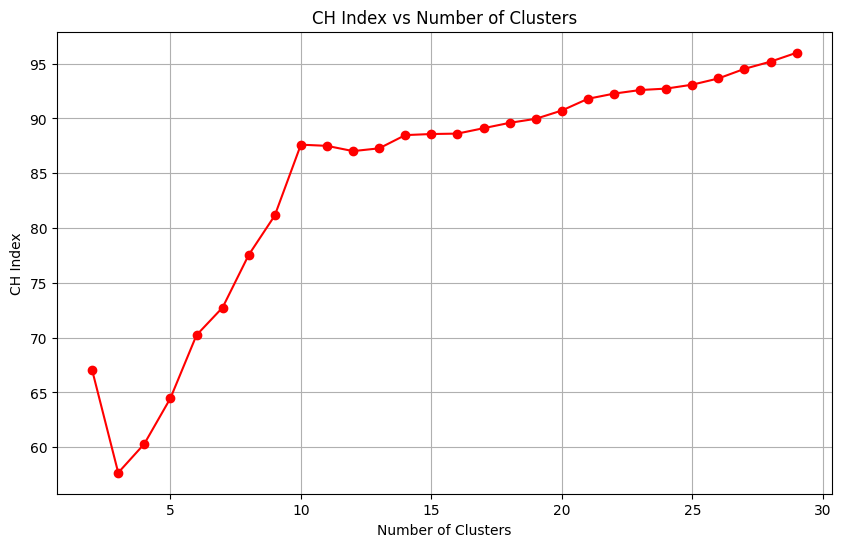

In [23]:
hc_scores = []
cluster_range = range(2, 30) 

for i in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(df_standardised)
    score = calinski_harabasz_score(df_standardised, clustering.labels_)
    hc_scores.append(score)
    print(f"CH Index for {i} clusters: {score}")

# Plot Davies-Bouldin Index vs Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, hc_scores, marker='o', color='red')
plt.title("CH Index vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("CH Index")
plt.grid(True)
plt.show()


We shall stick into n=17, by taking average of n=16 and n=18 as suggested by the first 2 evaluation metrics as the CH index is not very helpful

/var/folders/v1/mtx8w7_x4_v9cxfsnmjqfxlm0000gn/T/ipykernel_65979/679356589.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', 17)


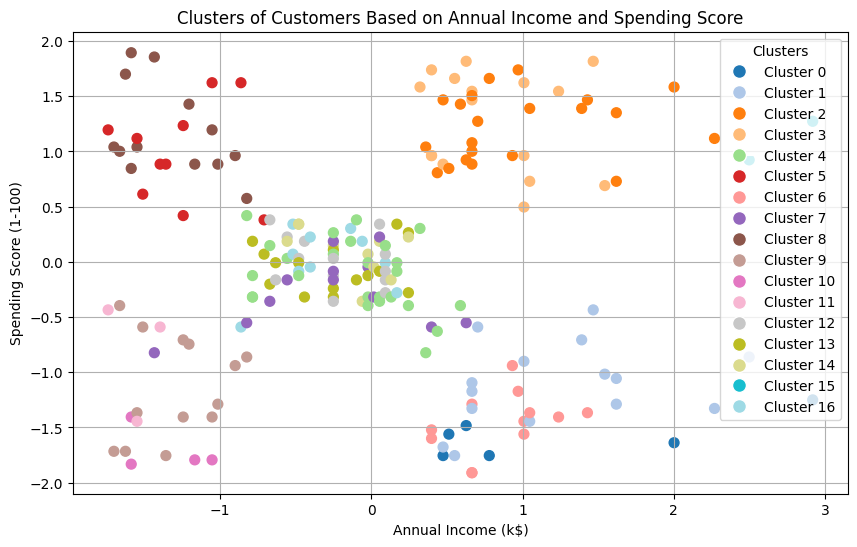

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib import cm


# Apply Agglomerative Clustering with 17 clusters
clustering = AgglomerativeClustering(n_clusters=17)
df_new['Cluster'] = clustering.fit_predict(df_standardised)

# Manually generate a colormap that supports 17 distinct colors, as legend_elements in matplotlib only generated up to 9 colours
cmap = cm.get_cmap('tab20', 17) 
# Plot the clusters using 'Annual Income' and 'Spending Score'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_standardised['Annual Income (k$)'], 
                      df_standardised['Spending Score (1-100)'], 
                      c=df_new['Cluster'], cmap=cmap, s=50)

# Manually create a legend for all 17 clusters
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', 
                          markerfacecolor=cmap(i / 17), markersize=10) for i in range(17)]

plt.legend(handles=legend_elements, title="Clusters", loc="upper right")

# Add title and labels
plt.title("Clusters of Customers Based on Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)

plt.show()



From the clustering above with n=17,there is an overwhleming evidence of overfitting. In addition, n=17 is relatively high for a dataset with only 200 datasets, suggesting the model may have oversegmented the data. This happens when the number of clusters exceeds the intrinsic complexity of the data, which is very likely what happened with n=17 clusters.

One main reason could be because we included features like Gender and Age into the clustering, which are non-essential features compared to Annual Income and Spending Score Hence, we decided to not go ahead with the standardising, and to not use all the features in the clustering. For further analysis, we will focus on core features like Annual income and Spoending Score.

## 6. Investigation into each cluster

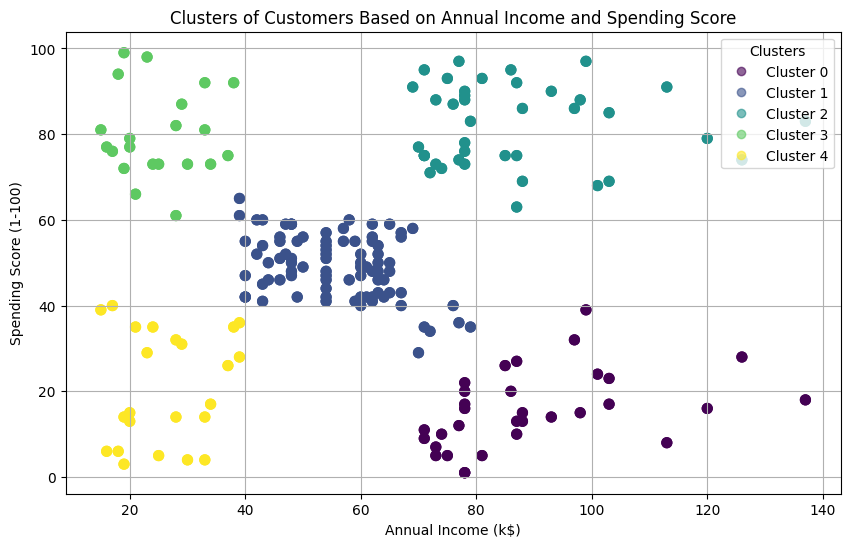

In [35]:
# Apply Agglomerative Clustering with the optimal number of clusters (n=5)
clustering = AgglomerativeClustering(n_clusters=5)
df_new['Cluster'] = clustering.fit_predict(df_reduced)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_reduced['Annual Income (k$)'], df_reduced['Spending Score (1-100)'], 
            c=df_new['Cluster'], cmap='viridis', s=50)
scatter = plt.scatter(df_reduced['Annual Income (k$)'], df_reduced['Spending Score (1-100)'], 
                      c=df_new['Cluster'], cmap='viridis', s=50)
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
plt.legend(handles, [f"Cluster {i}" for i in range(5)], title="Clusters", loc="upper right")

plt.title("Clusters of Customers Based on Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()



Insights into cluster
Cluster 0 (bottom right) - high income, low spending score
Cluster 1 (middle) - likely spenders who have an average income and average spending score
Cluster 2 (top right) - high income, high spending scores
Cluster 3 (top left) - lower income, but with high spending scores.
Cluster 4 (bottom left) - low income, low spending scores
Let’s look further into the statistic of each cluster to gain more insights, particularly the age and gender distribution


In [26]:

# Analyzing the characteristics of each cluster
cluster_summary = df_new.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Age': ['mean', 'std'],
    'Gender': ['mean', 'count']
})

# Display the summarized statistics for each cluster
print(cluster_summary)

        Annual Income (k$)            Spending Score (1-100)             \
                      mean        std                   mean        std   
Cluster                                                                   
0                89.406250  16.612975              15.593750   8.936548   
1                55.811765   9.731508              49.129412   7.281399   
2                86.538462  16.312485              82.128205   9.364489   
3                25.095238   7.133756              80.047619  10.249274   
4                26.304348   7.893811              20.913043  13.017167   

               Age               Gender        
              mean        std      mean count  
Cluster                                        
0        41.000000  11.036596  0.437500    32  
1        42.482353  16.395856  0.600000    85  
2        32.692308   3.728650  0.538462    39  
3        25.333333   5.378971  0.571429    21  
4        45.217391  13.228607  0.608696    23  


/var/folders/v1/mtx8w7_x4_v9cxfsnmjqfxlm0000gn/T/ipykernel_65979/4253580349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df_new, palette="viridis")


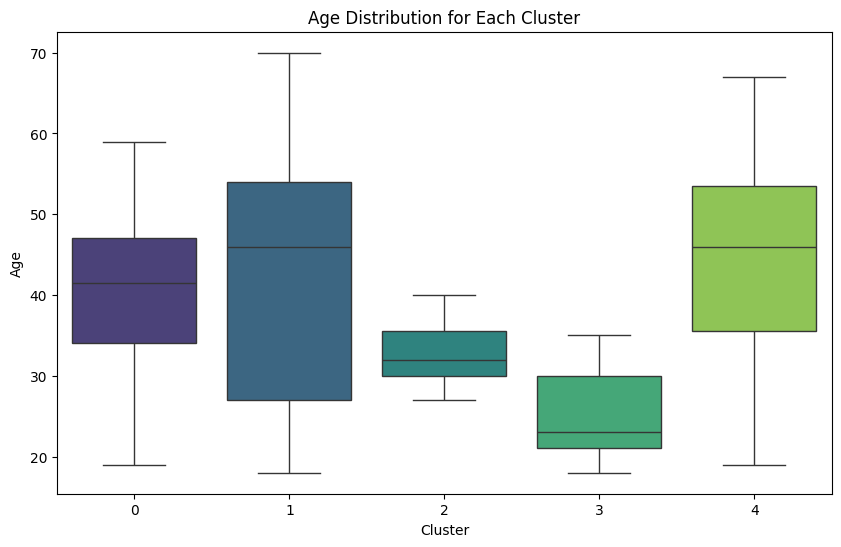

In [27]:
# Create a boxplot for Age distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=df_new, palette="viridis")
plt.title('Age Distribution for Each Cluster')
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()



Age Band  10-19  20-29  30-39  40-49  50-59  60-69  70-79
Cluster                                                  
0             2      2      9     12      7      0      0
1             8     18     10     19     14     14      2
2             0      8     30      1      0      0      0
3             1     14      6      0      0      0      0
4             1      1      6      7      4      4      0


/var/folders/v1/mtx8w7_x4_v9cxfsnmjqfxlm0000gn/T/ipykernel_65979/3342983426.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_band_counts = df_new.groupby(['Cluster', 'Age Band']).size().unstack().fillna(0)


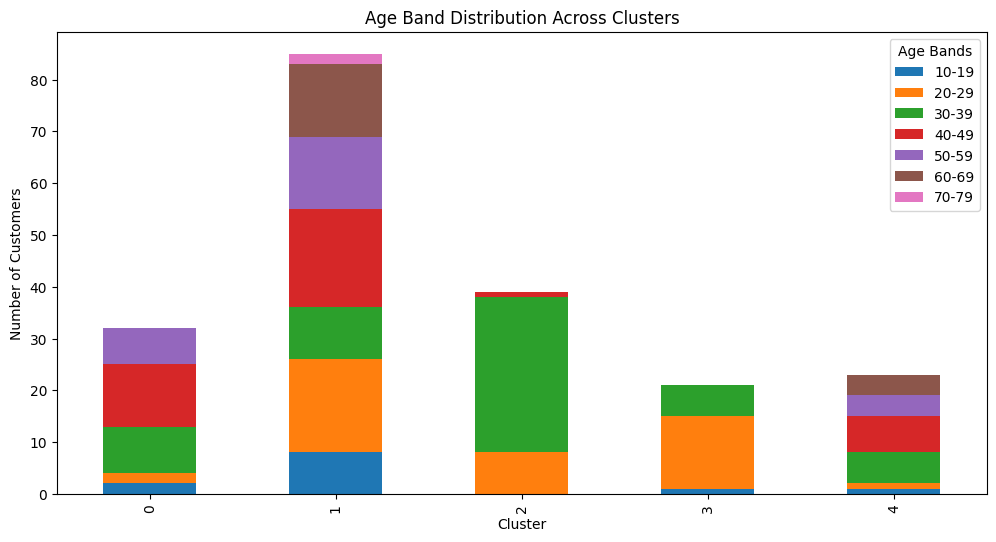

In [28]:
# Create age bands using pandas `cut` function
df_new['Age Band'] = pd.cut(df_new['Age'], bins=[10, 19, 29, 39, 49, 59, 69, 79], labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

# Count the number of customers in each age band for each cluster
age_band_counts = df_new.groupby(['Cluster', 'Age Band']).size().unstack().fillna(0)
print(age_band_counts)

# Visualize the age band distribution for each cluster
age_band_counts.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Age Band Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(title='Age Bands')
plt.show()

#### While this provides a good insight into the age copmposition for each cluster, certain clusters having more total population makes it harder to visualise. Let's normmalize each data

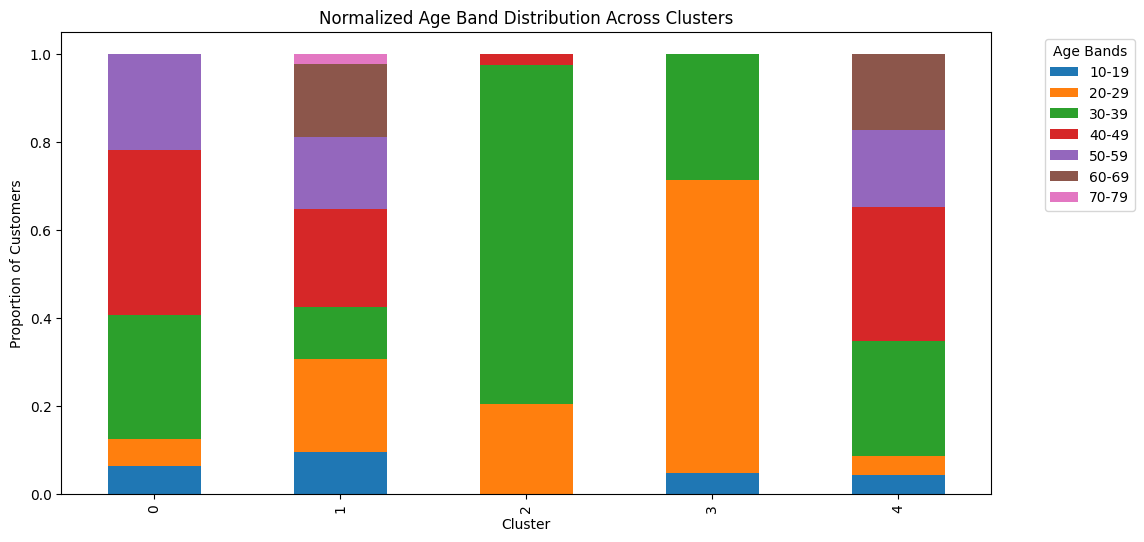

In [29]:
# Normalize the counts by dividing by the total number of customers in each cluster
age_band_normalized = age_band_counts.div(age_band_counts.sum(axis=1), axis=0)

age_band_normalized.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Normalized Age Band Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Customers')
plt.legend(title='Age Bands', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/v1/mtx8w7_x4_v9cxfsnmjqfxlm0000gn/T/ipykernel_65979/2943185512.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_age_counts = df_new.groupby(['Age Band', 'Cluster']).size().unstack().fillna(0)


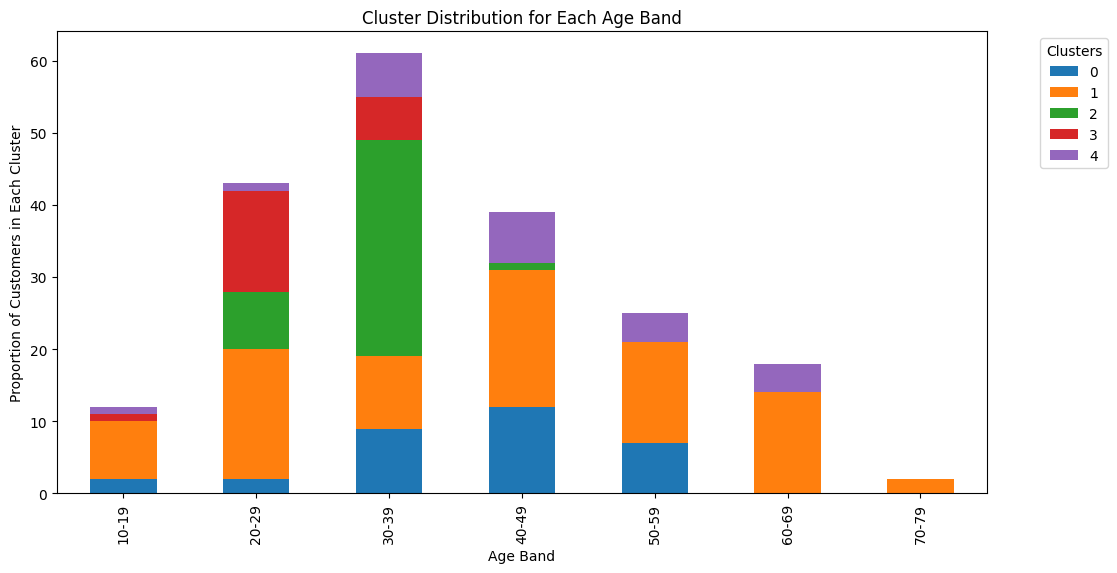

In [30]:
# Count the number of customers in each cluster for each age band
cluster_age_counts = df_new.groupby(['Age Band', 'Cluster']).size().unstack().fillna(0)


# Plot the normalized distribution of clusters for each age band
cluster_age_counts.plot(kind='bar', figsize=(12, 6), stacked=True)

# Add title and labels
plt.title('Cluster Distribution for Each Age Band')
plt.xlabel('Age Band')
plt.ylabel('Proportion of Customers in Each Cluster')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()